# Pre-requisites

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, Lars, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score

# Ingestion

In [4]:
df = pd.read_csv('data/auto-mpg-treated.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    int64  
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   age           392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB


all independent variables are numeric

# user-defined pipeline
to train and compare multiple regression models on the dataset

In [5]:
# instantiate dict to hold training and test scores
    # keys will be model names
    # values will be R2 scores

dictResult = {}

In [27]:
# helper function to train the model, plot the resutls
def buildModel(
        modelToFit,
        columnNamesY,
        columnNamesX,
        testFraction = 0.2,
        preprocessor = None,
        showPlotPrediction = False,
        showPlotModel = False,):
    
    # choosing independent and dependent variables
    X = df[columnNamesX]
    y = df[columnNamesY]

    # preprocessing
    if preprocessor is not None:
        X = preprocessor(X)
    
    # train-test split
    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=testFraction)
    print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

    # calling the passed funtion which will instantiate and fit the model
    model = modelToFit(xTrain, yTrain)

    # prediction
    yPred = model.predict(xTest)

    # model evaluation on training data
    scoreTraining = model.score(xTrain, yTrain)
    
    # model evaluation on test data
    scoreTest = r2_score(yTest, yPred)

    # plot prediction vs actual
    if showPlotPrediction:
        fig, ax = plt.subplots(figsize=(16, 6))
        plt.plot(yPred, label='prediction')
        plt.plot(yTest.values, label='actual')
        plt.ylabel(columnNamesY)
        plt.legend()
        plt.show()

    # plot model on training data
    if showPlotModel:
        fig, ax = plt.subplots(figsize=(16, 6))
        plt.scatter(xTest, yTest)
        plt.plot(xTest, yPred, color='r')
        plt.legend(['test data', 'model'])
        plt.show()

    return {
        'training score': round(scoreTraining, 2),
        'test score': round(scoreTest, 2)
    }

In [14]:
# helper function to compare results of all the models trained 
def compareResults():
    for key in dictResult:
        print('regression:', key)
        print('training score', dictResult[key]['training score'])
        print('test score', dictResult[key]['test score'], end='\n')

In [23]:
# function to instantiate and fit a linear regression model
    # takes training data
    # returns a model
# called by buildModel function
def _LinReg(xTrain, yTrain):
    model = LinearRegression()
    model.fit(xTrain, yTrain)

    return model    

(313, 1) (79, 1) (313,) (79,)


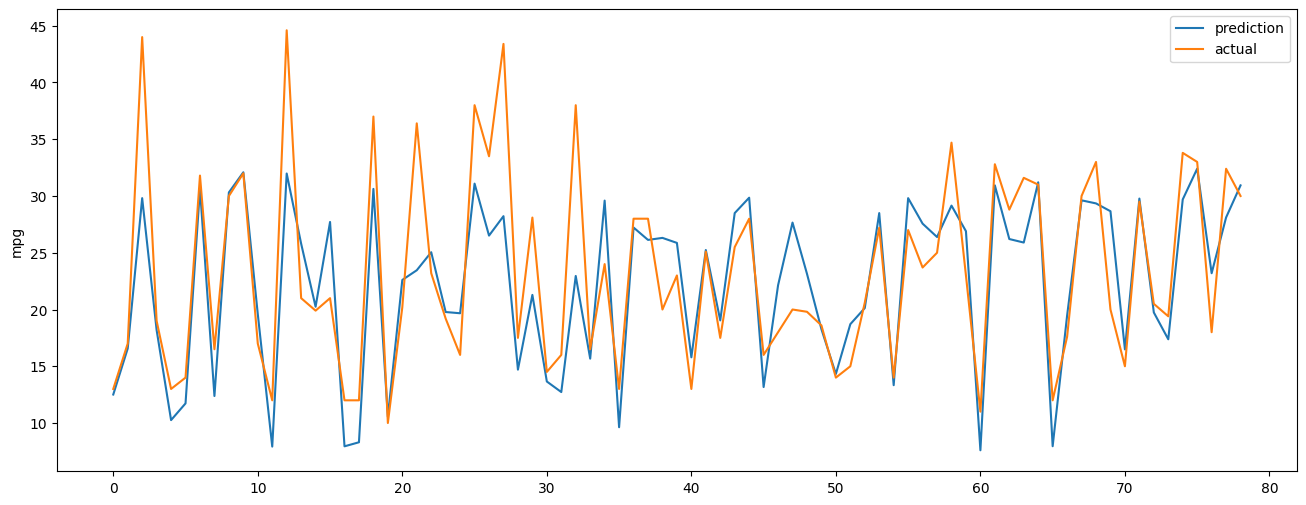

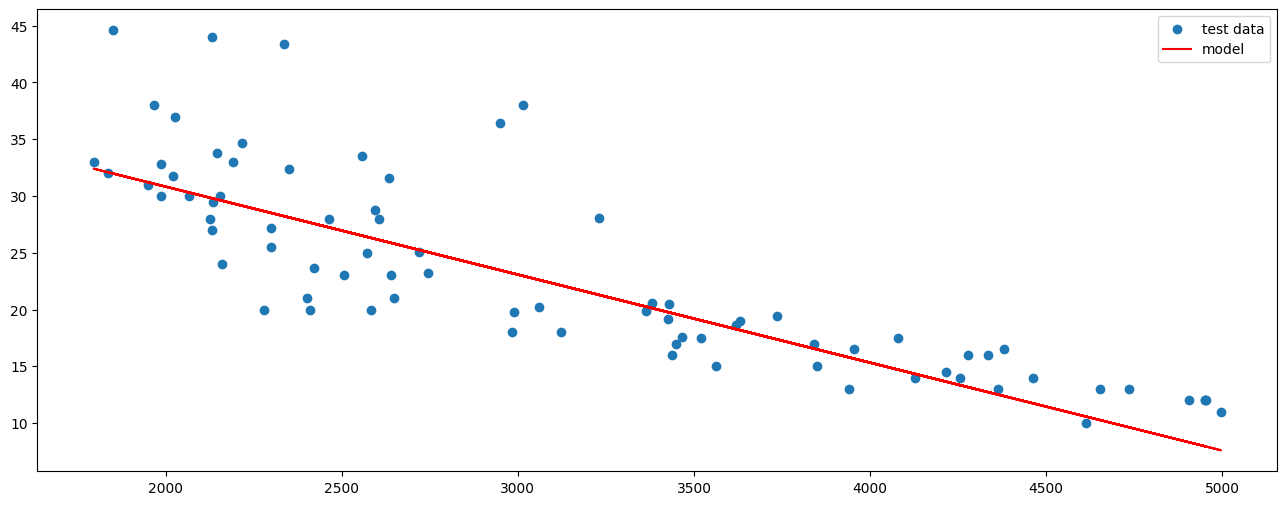

In [28]:

dictResult['univariate_linear_regression'] = buildModel(
                                                        _LinReg,
                                                        'mpg',
                                                        ['weight'],
                                                        showPlotPrediction=True,
                                                        showPlotModel=True
                                                    )

In [19]:
compareResults()

regression: univariate_linear_regression
training score 0.69
test score 0.68
